In [31]:
import pandas as pd 
import numpy as np
import seaborn as sns
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from matplotlib import font_manager




In [32]:
gdp = pd.read_csv('Data_cleaned/gdp.csv')
gdp = gdp.drop(columns=['Unnamed: 0'])
gdp.head()

,gdp,Country_Year
0,539.15,Australia_2000
1,235.38,Austria_2000
2,284.86,Belgium_2000
3,901,Canada_2000
4,145.36,Chile_2000


In [33]:
gdp[['Country', 'Year']] = gdp['Country_Year'].str.split('_', expand=True)
gdp = gdp.drop(columns = ['Country_Year'])
gdp.head()

,gdp,Country,Year
0,539.15,Australia,2000
1,235.38,Austria,2000
2,284.86,Belgium,2000
3,901,Canada,2000
4,145.36,Chile,2000


In [34]:
wealth = pd.read_csv('Data_Uncleaned/wealth.csv')
wealth = wealth.drop(columns = ['POPULATION', 'Population', 'Flag Codes', 'Flags'])
wealth.head()

,COUNTRY,Country,VAR,Variable,TIME,Time,Value
0,AUS,Australia,T3AC2,Mean financial assets per household (current p...,2012,2012,139870.0
1,AUS,Australia,T3AC2,Mean financial assets per household (current p...,2014,2014,164058.0
2,AUS,Australia,T3AC2,Mean financial assets per household (current p...,2018,2018,216351.0
3,AUS,Australia,T3AC3,Mean liabilities per household (current prices),2012,2012,130092.0
4,AUS,Australia,T3AC3,Mean liabilities per household (current prices),2014,2014,144916.0


In [35]:
poverty = wealth[wealth['VAR'] == 'T6AC6'].reset_index()
poverty  =poverty.drop(columns =['index', 'VAR', 'Variable', 'TIME'])
poverty.rename(columns = {'Value' : 'Share of Individuals with net Wealth less than 25% of the poverty line', 'Time' : 'Year'}, inplace = True)
poverty.head()

,COUNTRY,Country,Year,Share of Individuals with net Wealth less than 25% of the poverty line
0,AUS,Australia,2014,5.70
1,AUS,Australia,2018,7.30
2,AUT,Austria,2011,14.54
3,AUT,Austria,2014,13.77
4,AUT,Austria,2017,12.93


In [36]:
poverty['Year'] = poverty['Year'].astype(int)
gdp['Year'] = gdp['Year'].astype(int)

In [37]:
merged = pd.merge(poverty, gdp, on = ['Country', 'Year'], how = 'inner')
merged.head()


,COUNTRY,Country,Year,Share of Individuals with net Wealth less than 25% of the poverty line,gdp
0,AUS,Australia,2014,5.70,"1,118.59"
1,AUS,Australia,2018,7.30,"1,326.20"
2,AUT,Austria,2011,14.54,373.03
3,AUT,Austria,2014,13.77,417.06
4,AUT,Austria,2017,12.93,476.59


In [38]:
merged = merged.sort_values(by = 'Year', ascending= True)
merged.head()

,COUNTRY,Country,Year,Share of Individuals with net Wealth less than 25% of the poverty line,gdp
24,FRA,France,2009,16.070000,"2,243.85"
21,FIN,Finland,2009,15.770000,202.72
30,GRC,Greece,2009,8.979999,337.19
37,ITA,Italy,2010,7.440000,"2,083.74"
5,BEL,Belgium,2010,11.860000,434.01


In [39]:
merged['gdp'] = merged['gdp'].str.replace(',', '')

# Convert the 'gdp' column to numeric data type
merged['gdp'] = pd.to_numeric(merged['gdp'])



In [40]:
dp_counts = merged['Year'].value_counts()
print(dp_counts)


Year
2014    16
2017    11
2018     7
2016     6
2019     6
2013     5
2015     5
2010     4
2011     4
2009     3
2012     2
Name: count, dtype: int64


In [41]:
vis = merged[merged['Year'] == 2014]
# vis = merged
# vis.head()

<Axes: xlabel='gdp', ylabel='Share of Individuals with net Wealth less than 25% of the poverty line'>

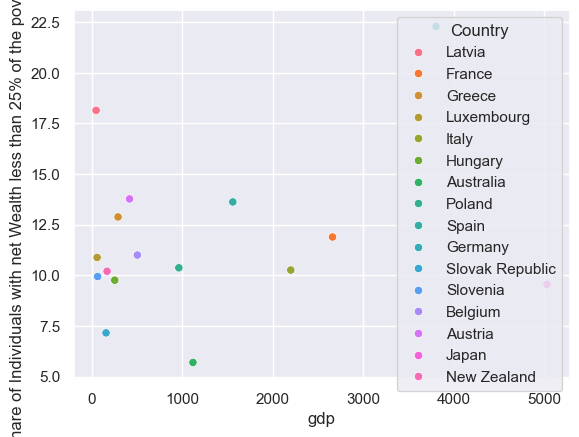

In [42]:
sns.scatterplot(data=vis, x="gdp", y="Share of Individuals with net Wealth less than 25% of the poverty line", hue="Country")


In [43]:
fig = px.scatter(vis, x="gdp", y="Share of Individuals with net Wealth less than 25% of the poverty line", trendline="ols", trendline_scope="overall",
                 #size="pop", 
                 color="Country",
           hover_name="Country", #log_x=True, size_max=60
           title="Percentage of Population in Extreme Poverty and GDP", 
           )

fig.update_layout(
    title={
        'text': "Percentage of Population in Extreme Poverty and GD",
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})



# add immigration for bubble size? Make a dropdown that will allow us to choose the year
# add a line of best fit? 
fig.show()

In [44]:
poverty.head()

,COUNTRY,Country,Year,Share of Individuals with net Wealth less than 25% of the poverty line
0,AUS,Australia,2014,5.70
1,AUS,Australia,2018,7.30
2,AUT,Austria,2011,14.54
3,AUT,Austria,2014,13.77
4,AUT,Austria,2017,12.93


In [45]:
print(poverty['Country'].unique())

['Australia' 'Austria' 'Belgium' 'Canada' 'Germany' 'Denmark' 'Spain'
 'Estonia' 'Finland' 'France' 'United Kingdom' 'Greece' 'Hungary'
 'Ireland' 'Italy' 'Korea' 'Luxembourg' 'Latvia' 'Netherlands' 'Norway'
 'New Zealand' 'Poland' 'Portugal' 'Slovak Republic' 'Slovenia'
 'United States' 'Japan' 'Lithuania']


In [46]:


fig = px.bar(vis, x="Country", y="Share of Individuals with net Wealth less than 25% of the poverty line", #color="Country",
             #pattern_shape="Country", #pattern_shape_sequence=[".", "x", "+"]
             )
fig.show()

# I could put gdp on the other axis 

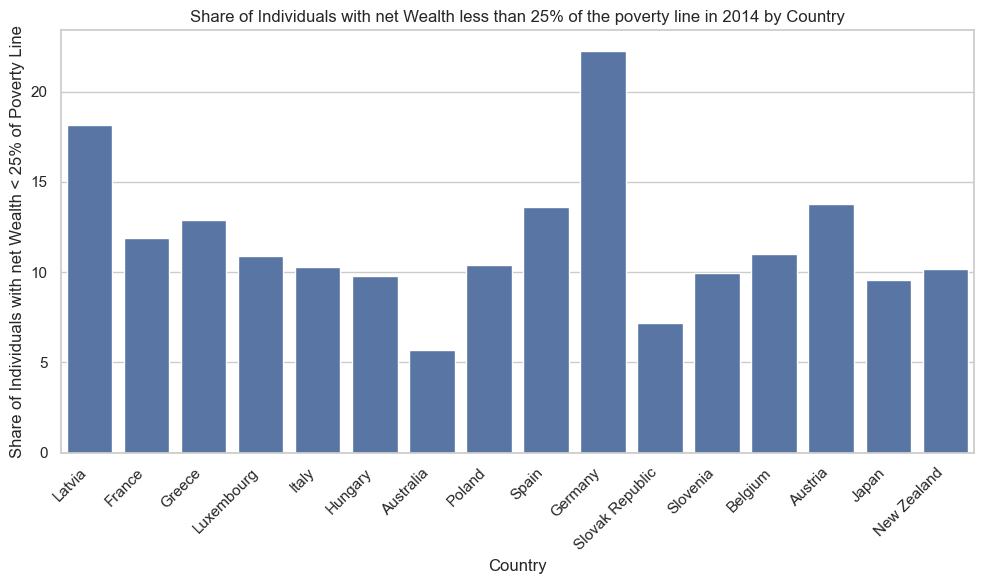

In [47]:

sns.set_style("whitegrid")

plt.figure(figsize=(10, 6))
sns.barplot(data=vis, x="Country", y="Share of Individuals with net Wealth less than 25% of the poverty line")

plt.xticks(rotation=45, ha='right')

plt.xlabel('Country')
plt.ylabel('Share of Individuals with net Wealth < 25% of Poverty Line')
plt.title('Share of Individuals with net Wealth less than 25% of the poverty line in 2014 by Country')

# Show the plot
plt.tight_layout()
plt.show()


/var/folders/zl/mwx636ts1pbc006v4wqp6fwr0000gn/T/ipykernel_11656/729059900.py:19: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



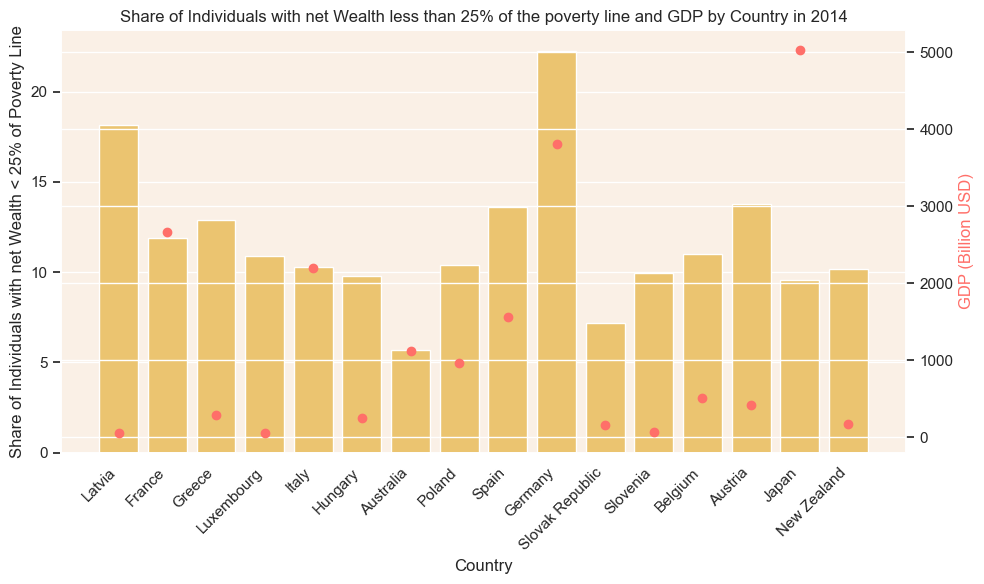

In [50]:
sns.set_theme()




plt.figure(figsize=(10, 6))
ax1 = sns.barplot(data=vis, x="Country", y="Share of Individuals with net Wealth less than 25% of the poverty line", color='#ffcc5c')

ax2 = ax1.twinx()
ax2.scatter(vis['Country'], vis['gdp'], color='#ff6f69', marker='o', linestyle='-')

ax1.set_xlabel('Country')
ax1.set_ylabel('Share of Individuals with net Wealth < 25% of Poverty Line',#color='#ffcc5c'
               )
ax2.set_ylabel('GDP (Billion USD)', color='#ff6f69')
ax1.set_facecolor('#faf0e6')


ax1.set_xticklabels(vis['Country'], rotation=45, ha='right')


plt.title('Share of Individuals with net Wealth less than 25% of the poverty line and GDP by Country in 2014',)
plt.tight_layout()
plt.show()
